## Homework 3

### Santiago Tabares
### 1036666894

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

## Gradient Descent method implementation 

In [58]:
def gradient_descent(x, y, theta_0, theta_1, alpha, epochs):
    
    MSE = []
    MAE= []
    MAPE = []
    
    for i in range(epochs):
    
        h = theta_1*x + theta_0
        d_theta_0 = (-1/len(x))*sum(y - h)
        d_theta_1 = (-1/len(x))*sum((y - h)*x)

        theta_0 += -alpha*d_theta_0
        theta_1 += -alpha*d_theta_1
        
        MSE.append((1/len(x))*sum((y - h)**2))
        MAE.append((1/len(x))*sum(abs(y - h)))
        MAPE.append((100/len(x))*sum(abs((y - h)/y)))
        
    return theta_0, theta_1, MSE, MAE, MAPE

## Best parameters using Gradient Descent method ($\theta_0, \theta_1$)

In [59]:
df = pd.read_csv("data.csv")

x = df.iloc[:, 0]
y = df.iloc[:, 1]

theta_1_0 = 10     
theta_0_0 = 10       
alpha = 0.0001   # alpha
epochs = 100     # The number of iterations  

theta_0, theta_1, MSE, MAE, MAPE = gradient_descent(x ,y, theta_0_0 ,theta_1_0,alpha,epochs)

print("θ_0 = ",theta_0 , "  θ_1 = ",theta_1)

θ_0 =  9.829227849520889   θ_1 =  1.2889137694663224


## Using scipy.optimize

In [64]:
def f(x, a0, a1):
    return x*a1 + a0

p0=np.array([10.0,10.0])
popt, pcov = curve_fit(f, x, y, p0, method="lm")
perr = np.sqrt(np.diag(pcov))
print("θ_0= ",popt[1])
print("θ_1= ",popt[0])

θ_0=  1.2873573726251593
θ_1=  9.908606057513113


## Visualizing loss functions

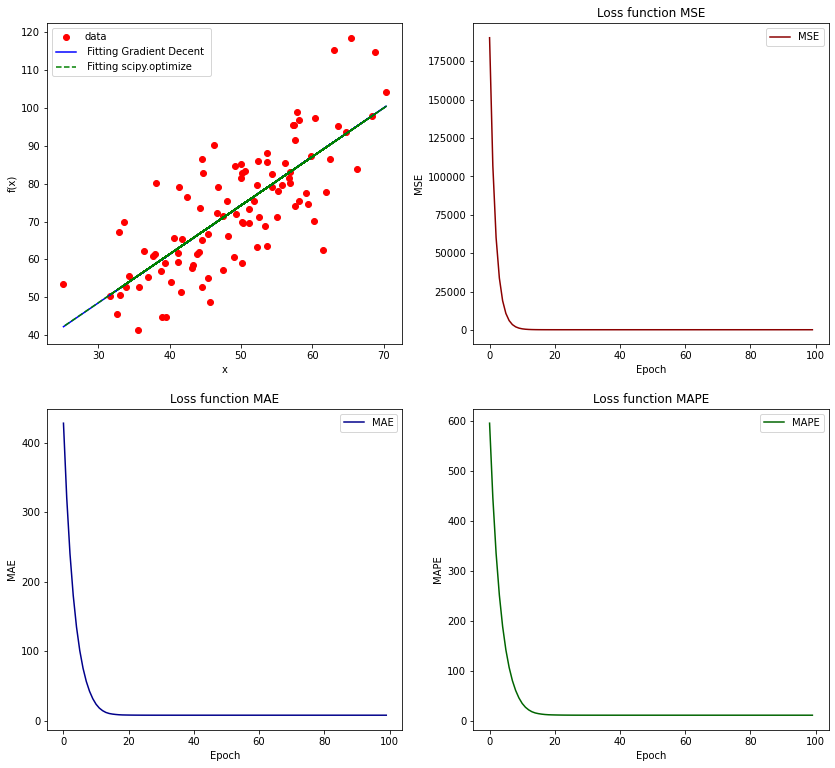

In [61]:
fig, ax = plt.subplots(2,2,figsize=(14,13))

ax[0,0].plot(x,y,"ro", label="data")
ax[0,0].plot(x,f(x,theta_1,theta_0), "-b", label = " Fitting Gradient Decent ")
ax[0,0].plot(x,f(x,popt[0],popt[1]), "--g", label = " Fitting scipy.optimize ")

plt.grid()

ax[0,0].set_xlabel("x")
ax[0,0].set_ylabel("f(x)")
ax[0,0].legend()


epochs = np.arange(100)

ax[0,1].plot(epochs, MSE,"-",color = "darkred", label = "MSE")
ax[0,1].set_xlabel("Epoch")
ax[0,1].set_ylabel("MSE")
ax[0,1].set_title("Loss function MSE")
ax[0,1].legend()


ax[1,0].plot(epochs, MAE,"-", color = "darkblue", label = "MAE")
ax[1,0].set_xlabel("Epoch")
ax[1,0].set_ylabel("MAE")
ax[1,0].set_title("Loss function MAE")
ax[1,0].legend()
plt.grid()


ax[1,1].plot(epochs, MAPE,"-", color = "darkgreen", label = "MAPE")
ax[1,1].set_xlabel("Epoch")
ax[1,1].set_ylabel("MAPE")
ax[1,1].set_title("Loss function MAPE")
ax[1,1].legend()




# What about Learning Rate ($\alpha$) parameter? 

θ0 =  10.114400846041175   θ1 =  15.822678693439126
θ0 =  1329288195.979179   θ1 =  67795378930.24488


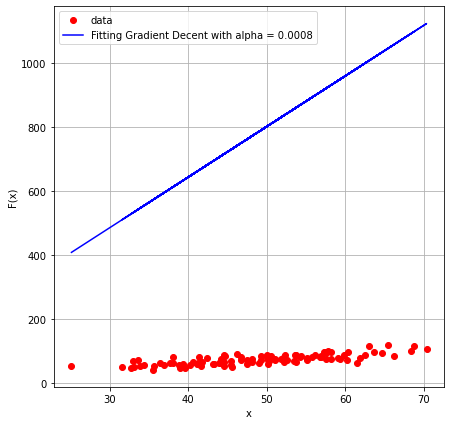

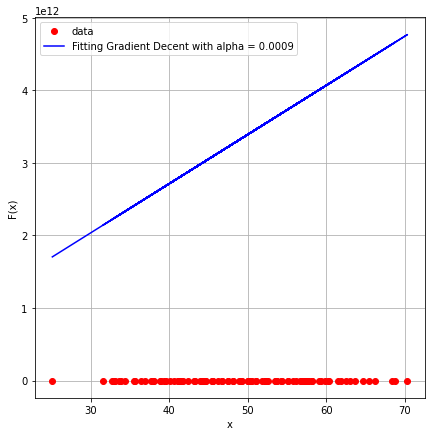

In [62]:
theta_1_0 = 10     
theta_0_0 = 10       
alpha = 0.0008   # changing alpha value
epochs = 100     # The number of iterations  

theta_0, theta_1, MSE, MAE, MAPE = gradient_descent(x, y, theta_0_0, theta_1_0, alpha, epochs)

print("θ0 = ",theta_0 , "  θ1 = ",theta_1)

fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.plot(x,y,"ro", label = "data")
ax.plot(x,f(x,theta_1,theta_0), "-b", label = "Fitting Gradient Decent with alpha = 0.0008")
ax.set_xlabel("x")
ax.set_ylabel("F(x)")
ax.legend()
plt.grid()

theta_1_0 = 10     
theta_0_0 = 10       
alpha = 0.0009   # changing alpha value
epochs = 100     # The number of iterations  

theta_0, theta_1, MSE, MAE, MAPE = gradient_descent(x, y, theta_0_0, theta_1_0, alpha,epochs)

print("θ0 = ",theta_0 , "  θ1 = ",theta_1)

fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.plot(x,y,"or", label = "data")
ax.plot(x,f(x,theta_1,theta_0),"-b", label = "Fitting Gradient Decent with alpha = 0.0009")
ax.set_xlabel("x")
ax.set_ylabel("F(x)")
ax.legend()
plt.grid()